In [1]:
import pandas as pd
data = pd.read_csv('retail_price.csv')
print(data.head())
print(f"Dataset contains {data.shape[0]} rows and {data.shape[1]} columns.")
print(data.info())
print(data.columns)

  product_id product_category_name  month_year  qty  total_price  \
0       bed1        bed_bath_table  01-05-2017    1        45.95   
1       bed1        bed_bath_table  01-06-2017    3       137.85   
2       bed1        bed_bath_table  01-07-2017    6       275.70   
3       bed1        bed_bath_table  01-08-2017    4       183.80   
4       bed1        bed_bath_table  01-09-2017    2        91.90   

   freight_price  unit_price  product_name_lenght  product_description_lenght  \
0      15.100000       45.95                   39                         161   
1      12.933333       45.95                   39                         161   
2      14.840000       45.95                   39                         161   
3      14.287500       45.95                   39                         161   
4      15.100000       45.95                   39                         161   

   product_photos_qty  ...  comp_1  ps1        fp1      comp_2  ps2  \
0                   2  ...    89.

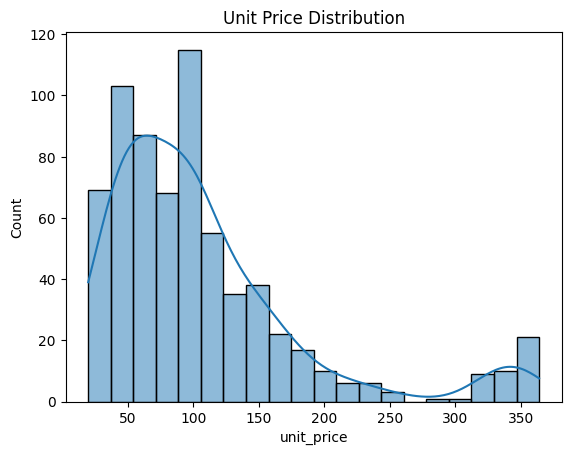

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['unit_price'], kde=True)
plt.title('Unit Price Distribution')
plt.show()


In [3]:
print(data.isnull().sum())
print(data.describe())
print(data.dtypes)


product_id                    0
product_category_name         0
month_year                    0
qty                           0
total_price                   0
freight_price                 0
unit_price                    0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_score                 0
customers                     0
weekday                       0
weekend                       0
holiday                       0
month                         0
year                          0
s                             0
volume                        0
comp_1                        0
ps1                           0
fp1                           0
comp_2                        0
ps2                           0
fp2                           0
comp_3                        0
ps3                           0
fp3                           0
lag_price                     0
dtype: int64
              qty   total_p

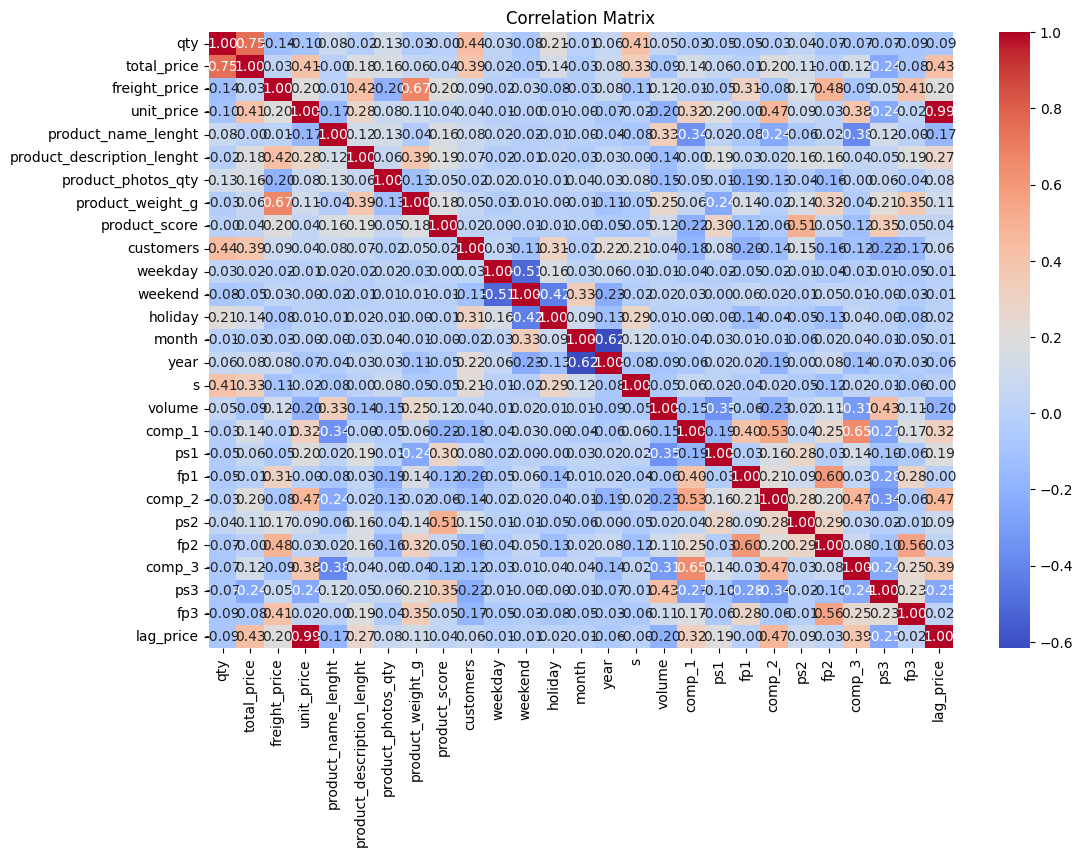

In [5]:
numeric_data = data.select_dtypes(include=['number', 'float64', 'int64'])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()

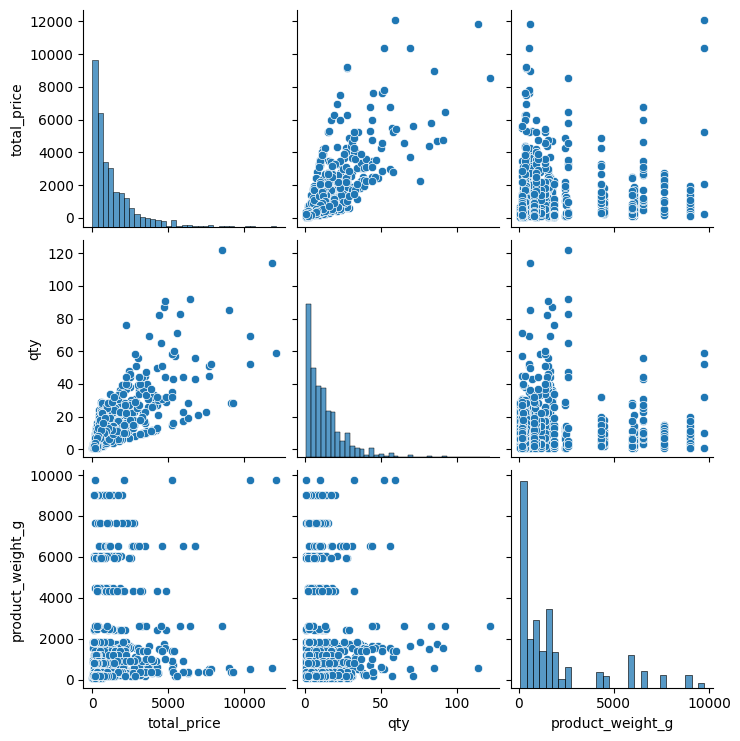

In [6]:
sns.pairplot(data[['total_price', 'qty', 'product_weight_g']])
plt.show()


In [7]:
data = pd.get_dummies(data, columns=['product_category_name', 'month_year'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['qty', 'freight_price', 'unit_price', 'product_weight_g']] = scaler.fit_transform(data[['qty', 'freight_price', 'unit_price', 'product_weight_g']])


In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(columns=['total_price']) 
y = data['total_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
X = data[['qty', 'freight_price', 'unit_price', 'product_weight_g']] 
y = data['total_price']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))


MAE: 424.2472434467825
R-squared: 0.8325116351944996


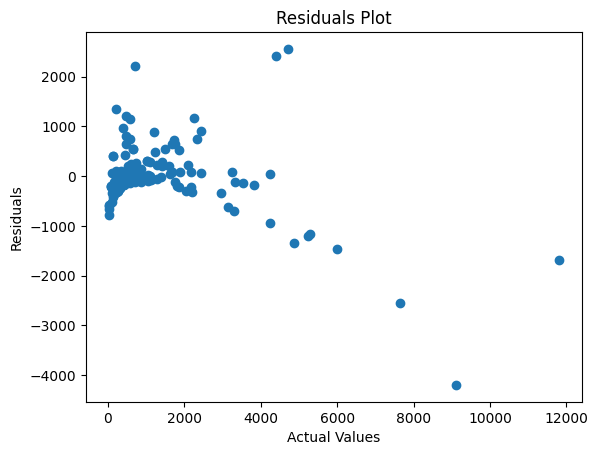

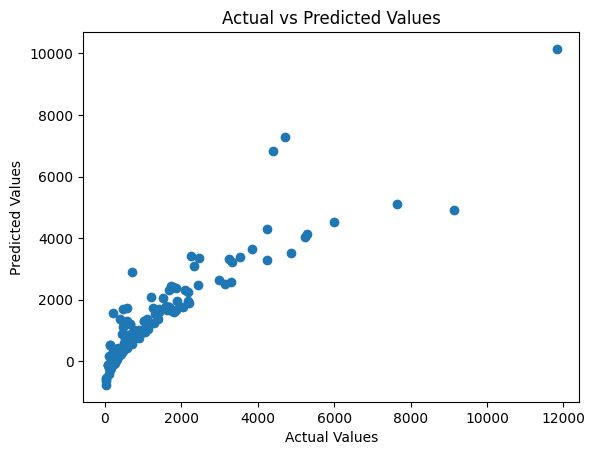

In [14]:
plt.scatter(y_test, y_pred - y_test)
plt.xlabel("Actual Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV
parameters = {'fit_intercept': [True, False]}
grid_search = GridSearchCV(LinearRegression(), parameters)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R-squared: {r_squared}")


Best Parameters: {'fit_intercept': True}
MAE: 424.2472434467825
R-squared: 0.8325116351944996


In [16]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_model, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())


Cross-validation scores: [0.80224014 0.67842912 0.74677742 0.893732   0.68798695]
Average cross-validation score: 0.7618331276433967


In [17]:
import joblib
joblib.dump(best_model, 'retail_price_prediction_model.pkl')


['retail_price_prediction_model.pkl']

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = grid_search.best_estimator_.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R-squared: {r2}")


MAE: 424.2472434467825
MSE: 529082.8191644135
R-squared: 0.8325116351944996


In [19]:
model = grid_search.best_estimator_
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 1420.4814718735292
Coefficients: [1367.44978198   17.54392092  815.45054349   57.80648973]


In [20]:
joblib.dump(grid_search.best_estimator_, 'retail_price_model.pkl')

['retail_price_model.pkl']